## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [6]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [7]:
train, test = keras.datasets.cifar10.load_data()

In [8]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [9]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
"""Code Here 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現
設定超參數
"""

LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.9, 0.85, 0.8, 0.75, 0.7]

In [12]:
results_nesterov_true = {}
results_nesterov_false = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for momentum in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %f" % (momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "mom-%s" % str(momentum)
    results_nesterov_true[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

    
for momentum in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %f" % (momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "mom-%s" % str(momentum)
    results_nesterov_false[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0726 11:53:56.244796 4565833152 deprecation_wrapper.py:118] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0726 11:53:56.370087 4565833152 deprecation_wrapper.py:118] From /anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Experiment with MOMENTUM = 0.950000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0726 11:53:56.487043 4565833152 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow_core/python/ops/math_grad.py:1251: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 151us/step - loss: 2.0066 - acc: 0.2846 - val_loss: 1.8461 - val_acc: 0.3425
Epoch 2/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.7953 - acc: 0.3694 - val_loss: 1.7448 - val_acc: 0.3881
Epoch 3/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.7147 - acc: 0.4005 - val_loss: 1.6862 - val_acc: 0.4073
Epoch 4/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6544 - acc: 0.4187 - val_loss: 1.6321 - val_acc: 0.4206
Epoch 5/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.6069 - acc: 0.4367 - val_loss: 1.6052 - val_acc: 0.4339
Epoch 6/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.5685 - acc: 0.4496 - val_loss: 1.5659 - val_acc: 0.4474
Epoch 7/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.5334 - acc: 0.4617 - val_loss: 1.5442 - 

Epoch 2/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.8660 - acc: 0.3429 - val_loss: 1.8234 - val_acc: 0.3618
Epoch 3/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.7904 - acc: 0.3725 - val_loss: 1.7661 - val_acc: 0.3864
Epoch 4/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.7375 - acc: 0.3921 - val_loss: 1.7235 - val_acc: 0.4013
Epoch 5/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.6987 - acc: 0.4059 - val_loss: 1.6799 - val_acc: 0.4141
Epoch 6/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.6666 - acc: 0.4174 - val_loss: 1.6511 - val_acc: 0.4272
Epoch 7/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.6379 - acc: 0.4286 - val_loss: 1.6359 - val_acc: 0.4286
Epoch 8/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.6116 - acc: 0.4352 - val_loss: 1.6092 - val_acc: 0.4347
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 7s 147us/step - loss: 1.8598 - acc: 0.3498 - val_loss: 1.8381 - val_acc: 0.3600
Epoch 4/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.8144 - acc: 0.3661 - val_loss: 1.7982 - val_acc: 0.3720
Epoch 5/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.7782 - acc: 0.3797 - val_loss: 1.7646 - val_acc: 0.3882
Epoch 6/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.7473 - acc: 0.3894 - val_loss: 1.7382 - val_acc: 0.3963
Epoch 7/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.7209 - acc: 0.3985 - val_loss: 1.7123 - val_acc: 0.4030
Epoch 8/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.6972 - acc: 0.4081 - val_loss: 1.6932 - val_acc: 0.4095
Epoch 9/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.6761 - acc: 0.4141 - val_loss: 1.6855 - val_acc: 0.4069
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 7s 131us/step - loss: 1.8382 - acc: 0.3582 - val_loss: 1.8196 - val_acc: 0.3642
Epoch 5/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.8030 - acc: 0.3698 - val_loss: 1.7889 - val_acc: 0.3747
Epoch 6/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.7745 - acc: 0.3809 - val_loss: 1.7624 - val_acc: 0.3857
Epoch 7/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.7496 - acc: 0.3904 - val_loss: 1.7392 - val_acc: 0.3924
Epoch 8/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.7278 - acc: 0.3956 - val_loss: 1.7204 - val_acc: 0.3980
Epoch 9/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.7078 - acc: 0.4040 - val_loss: 1.7022 - val_acc: 0.4047
Epoch 10/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.6896 - acc: 0.4104 - val_loss: 1.6824 - val_acc: 0.4088
Epoch 11/50
50000/50000 [===================

50000/50000 [==============================] - 10s 205us/step - loss: 1.8429 - acc: 0.3540 - val_loss: 1.8324 - val_acc: 0.3606
Epoch 6/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.8154 - acc: 0.3647 - val_loss: 1.8049 - val_acc: 0.3678
Epoch 7/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.7921 - acc: 0.3737 - val_loss: 1.7836 - val_acc: 0.3727
Epoch 8/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.7713 - acc: 0.3814 - val_loss: 1.7619 - val_acc: 0.3823
Epoch 9/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.7515 - acc: 0.3881 - val_loss: 1.7449 - val_acc: 0.3864
Epoch 10/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.7342 - acc: 0.3933 - val_loss: 1.7317 - val_acc: 0.3970
Epoch 11/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.7188 - acc: 0.3998 - val_loss: 1.7135 - val_acc: 0.3997
Epoch 12/50
50000/50000 [=================

50000/50000 [==============================] - 8s 158us/step - loss: 1.8337 - acc: 0.3587 - val_loss: 1.8211 - val_acc: 0.3638
Epoch 7/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.8095 - acc: 0.3692 - val_loss: 1.8046 - val_acc: 0.3665
Epoch 8/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.7887 - acc: 0.3764 - val_loss: 1.7865 - val_acc: 0.3732
Epoch 9/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.7709 - acc: 0.3823 - val_loss: 1.7646 - val_acc: 0.3851
Epoch 10/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.7539 - acc: 0.3896 - val_loss: 1.7475 - val_acc: 0.3914
Epoch 11/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.7391 - acc: 0.3931 - val_loss: 1.7329 - val_acc: 0.3947
Epoch 12/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.7252 - acc: 0.3999 - val_loss: 1.7192 - val_acc: 0.3970
Epoch 13/50
50000/50000 [=================

50000/50000 [==============================] - 6s 126us/step - loss: 1.5624 - acc: 0.4511 - val_loss: 1.5601 - val_acc: 0.4467
Epoch 8/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.5410 - acc: 0.4557 - val_loss: 1.5279 - val_acc: 0.4623
Epoch 9/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.5201 - acc: 0.4643 - val_loss: 1.5537 - val_acc: 0.4484
Epoch 10/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.4920 - acc: 0.4729 - val_loss: 1.5065 - val_acc: 0.4634
Epoch 11/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.4648 - acc: 0.4838 - val_loss: 1.4923 - val_acc: 0.4704
Epoch 12/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.4525 - acc: 0.4875 - val_loss: 1.4755 - val_acc: 0.4750
Epoch 13/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.4246 - acc: 0.4979 - val_loss: 1.4662 - val_acc: 0.4720
Epoch 14/50
50000/50000 [================

50000/50000 [==============================] - 6s 125us/step - loss: 1.6267 - acc: 0.4302 - val_loss: 1.6248 - val_acc: 0.4312
Epoch 9/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.6033 - acc: 0.4379 - val_loss: 1.5992 - val_acc: 0.4412
Epoch 10/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.5820 - acc: 0.4445 - val_loss: 1.5895 - val_acc: 0.4382
Epoch 11/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.5650 - acc: 0.4513 - val_loss: 1.5767 - val_acc: 0.4495
Epoch 12/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.5434 - acc: 0.4590 - val_loss: 1.5670 - val_acc: 0.4459
Epoch 13/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.5271 - acc: 0.4649 - val_loss: 1.5425 - val_acc: 0.4564
Epoch 14/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.5132 - acc: 0.4685 - val_loss: 1.5287 - val_acc: 0.4632
Epoch 15/50
50000/50000 [===============

50000/50000 [==============================] - 6s 124us/step - loss: 1.6547 - acc: 0.4221 - val_loss: 1.6516 - val_acc: 0.4197
Epoch 10/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.6377 - acc: 0.4267 - val_loss: 1.6397 - val_acc: 0.4207
Epoch 11/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.6211 - acc: 0.4333 - val_loss: 1.6234 - val_acc: 0.4338
Epoch 12/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.6077 - acc: 0.4373 - val_loss: 1.6195 - val_acc: 0.4273
Epoch 13/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.5913 - acc: 0.4419 - val_loss: 1.5998 - val_acc: 0.4423
Epoch 14/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.5762 - acc: 0.4484 - val_loss: 1.5887 - val_acc: 0.4455
Epoch 15/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.5657 - acc: 0.4524 - val_loss: 1.5754 - val_acc: 0.4473
Epoch 16/50
50000/50000 [==============

50000/50000 [==============================] - 6s 124us/step - loss: 1.6978 - acc: 0.4080 - val_loss: 1.6935 - val_acc: 0.4122
Epoch 11/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.6810 - acc: 0.4131 - val_loss: 1.6771 - val_acc: 0.4120
Epoch 12/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.6645 - acc: 0.4185 - val_loss: 1.6641 - val_acc: 0.4146
Epoch 13/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.6498 - acc: 0.4240 - val_loss: 1.6463 - val_acc: 0.4232
Epoch 14/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.6362 - acc: 0.4292 - val_loss: 1.6369 - val_acc: 0.4219
Epoch 15/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.6229 - acc: 0.4342 - val_loss: 1.6243 - val_acc: 0.4279
Epoch 16/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.6103 - acc: 0.4370 - val_loss: 1.6188 - val_acc: 0.4298
Epoch 17/50
50000/50000 [==============

50000/50000 [==============================] - 6s 125us/step - loss: 1.7240 - acc: 0.3986 - val_loss: 1.7180 - val_acc: 0.3967
Epoch 12/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.7096 - acc: 0.4044 - val_loss: 1.7065 - val_acc: 0.4036
Epoch 13/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.6949 - acc: 0.4097 - val_loss: 1.6891 - val_acc: 0.4086
Epoch 14/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.6811 - acc: 0.4149 - val_loss: 1.6788 - val_acc: 0.4145
Epoch 15/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6683 - acc: 0.4184 - val_loss: 1.6647 - val_acc: 0.4208
Epoch 16/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.6573 - acc: 0.4229 - val_loss: 1.6588 - val_acc: 0.4210
Epoch 17/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6450 - acc: 0.4266 - val_loss: 1.6459 - val_acc: 0.4308
Epoch 18/50
50000/50000 [==============

50000/50000 [==============================] - 9s 175us/step - loss: 1.7260 - acc: 0.3964 - val_loss: 1.7225 - val_acc: 0.3999
Epoch 13/50
50000/50000 [==============================] - 8s 170us/step - loss: 1.7143 - acc: 0.4013 - val_loss: 1.7115 - val_acc: 0.4002
Epoch 14/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.7012 - acc: 0.4067 - val_loss: 1.7063 - val_acc: 0.3998
Epoch 15/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.6895 - acc: 0.4095 - val_loss: 1.6881 - val_acc: 0.4110
Epoch 16/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.6780 - acc: 0.4137 - val_loss: 1.6782 - val_acc: 0.4141
Epoch 17/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.6671 - acc: 0.4192 - val_loss: 1.6691 - val_acc: 0.4179
Epoch 18/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.6570 - acc: 0.4218 - val_loss: 1.6576 - val_acc: 0.4208
Epoch 19/50
50000/50000 [==============

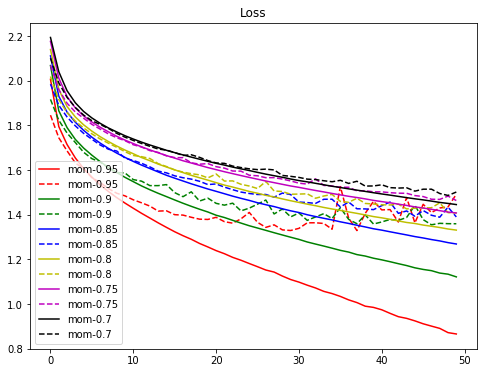

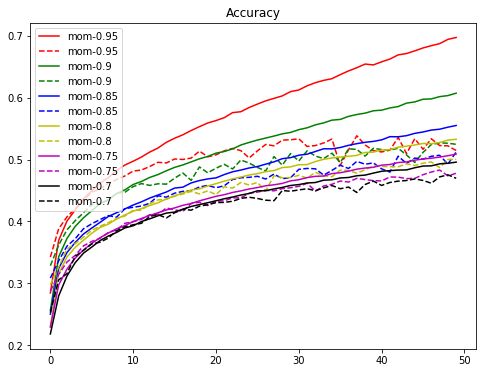

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_nesterov_true.keys()):
    plt.plot(range(len(results_nesterov_true[cond]['train-loss'])),results_nesterov_true[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_nesterov_true[cond]['valid-loss'])),results_nesterov_true[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_nesterov_true.keys()):
    plt.plot(range(len(results_nesterov_true[cond]['train-acc'])),results_nesterov_true[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_nesterov_true[cond]['valid-acc'])),results_nesterov_true[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

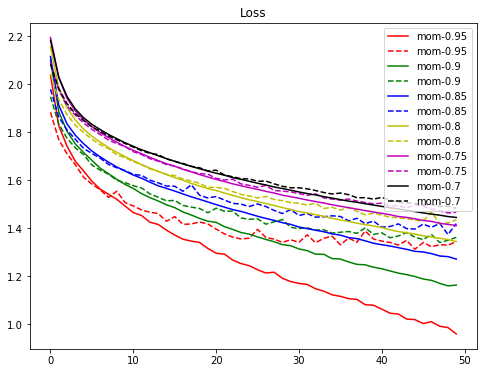

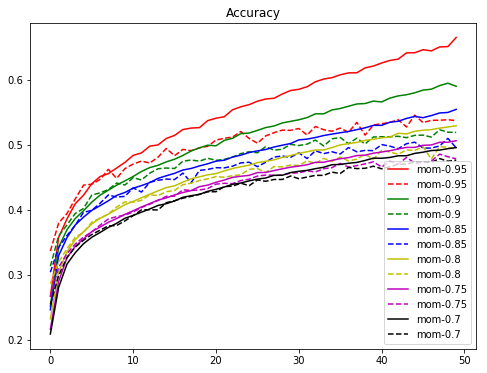

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_nesterov_false.keys()):
    plt.plot(range(len(results_nesterov_false[cond]['train-loss'])),results_nesterov_false[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_nesterov_false[cond]['valid-loss'])),results_nesterov_false[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_nesterov_false.keys()):
    plt.plot(range(len(results_nesterov_false[cond]['train-acc'])),results_nesterov_false[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_nesterov_false[cond]['valid-acc'])),results_nesterov_false[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()